<a href="https://colab.research.google.com/github/RafaelSapia/projetos_data_science/blob/master/Analisando_os_Dados_do_Airbnb_da_cidade_de_Nova_York.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Nova York*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Nova York, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

É necessário, antes de qualquer análise ou construção de um modelo em Data Science, declarar quais pacotes de funções para dentro do *notebook*.

Funções nada mais são que os **métodos** que serão usados para tratar nossos dados.

In [0]:
# importar os pacotes necessários 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Os dados utilizados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html)

Para esta análise exploratória inicial foi utilizado o conjunto de dados abaixo:

*  ```listings.csv```- *Summary information and metrics for listings in New York City (good for visualisations)*. 

In [0]:
# importar o arquivo listings.csv para um DataFrame

df = pd.read_csv("http://data.insideairbnb.com/united-states/ny/new-york-city/2020-05-06/visualisations/listings.csv")

##Análise dos Dados

O conjunto apresentado abaixo mostra todas as "colunas" do nosso conjunto de dados, tudo oque é possivel de se analisar sobre o Airbnb a partir deste *dataset*.

**Dicionário de Variáveis**

*  ```id``` - número de id gerado para identificar o imóvel
*  ```name``` - nome da propriedade anunciada
*  ```host_id``` - número de id gerado para identificar o anfitrião
*  ```host_name``` - nome do anfitrião
*  ```neighbourhood_group``` - distrito onde se localiza o imóvel
*  ```neighbourhood``` - bairro onde se localiza o imóvel
*  ```latitude``` - coordenada da latitude do imóvel
*  ```longitude``` - coordenada da longitude do imóvel
*  ```room_type``` - tipo de quarto que é oferecido
*  ```price``` - preço pedido pelo aluguel do imóvel
*  ```minimum_nights``` - quantidade minimas de noites para reservar
*  ```number_of_reviews``` - número de reviews que o imóvel possui 
*  ```last_review``` - data da última visualização do imóvel 
*  ```reviews_per_month``` - número de visualizações por mês do imóvel
*  ```calculated_host_listings_count``` - número de imóveis por anfitrião
*  ```availability_365``` - número de dias de disponibilidade dentro de um ano


Antes de iniciamos a análise propriamente, é **necessário conhecer a cara dos dados que serão estudados**.

In [0]:
# Mostrando as 5 primeiras entradas do conjunto de dados

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2060,Modern NYC,2259,Jenny,Manhattan,Washington Heights,40.85722,-73.93790,Private room,100,1,1,2008-09-22,0.01,1,1
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,3,48,2019-11-04,0.38,2,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,318,2020-04-26,4.66,1,261
3,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,78,2019-10-13,0.58,1,0
4,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,29,50,2019-12-02,0.38,1,365


###**Q1 - Quantos atributos (variáreis) e quantas entradas existem no conjunto de dados? Quais são os tipos dessas variáveis?** 

Apresentaremos agora a quantidade de variáveis e de entradas existem no conjunto de dados analisado, dando inicio assim, à análise exploratória.

É valido ressaltar que existe uma versão mais completa com esses mesmos dados, porém com uma quantidade maior de variáveis (106). Este é encontrado no site [Inside Airbnb](http://insideairbnb.com/get-the-data.html) com o nome de ```listing.csv.gr```.

Para o nível de análise que se quer neste *notebook* o conjunto de dados mais enxuto é suficiente.

Podemos ver a quantidade de entradas e atributos, assim como o tipo de cada variáveis. Nenhuma anomalia encontrada quanto ao tipo da variável, portanto nenhuma transformação será necessária, podemos prosseguir com a análise.

In [0]:
# Mostrando a quantidade de atributos e entradas 

print("Entradas: {}".format(df.shape[0]))
print("Atributos: {}\n".format(df.shape[1]))

# Mostrando o tipo de cada atributo

display(df.dtypes)

Entradas: 50246
Atributos: 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

###**Q2 - Qual a porcentagem de valores ausentes no *dataset*?**

Valores ausentes são um problema quando queremos analisar dados, é necessário sempre conferir se existe algum no conjunto que está se trabalhando e verificar a relevância dessa ausência.
Observando os números abaixo vemos que:

*  As variáveis ```reviews_per_month``` e ```last_review``` possuem praticamente 22% dos dados ausentes. Trabalhar com essas variáveis poderá gerar resultados não representativos.
* As variáveis ```name``` e ```host_name``` apresentam ausências pouco significantes, menores que 0,5%.

In [0]:
# Ordenando as variáveis em ordem decrescente de valores faltantes

df.isnull().sum().sort_values(ascending=False)

# Fazendo a porcentagem dos faltantes em relação ao total de entradas

(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

reviews_per_month                 0.219520
last_review                       0.219520
name                              0.000358
host_name                         0.000219
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

###**Q3 - Qual é o tipo de distribuição das variáveis?**



Analisar como uma variável se comporta é essencial para insights futuros e construção de modelos. Por isso, logo de cara é necessário observar o histograma das de cada variável e fazer uma análise visual a fim de observar possíveis incongruências.

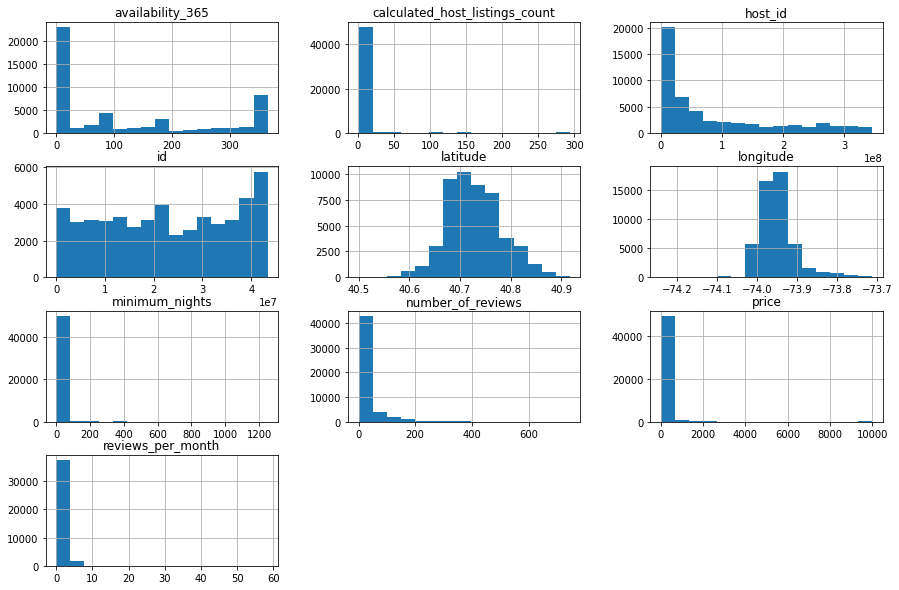

In [0]:
# Plotar os histogramas de cada variável

df.hist(bins = 15, figsize=(15, 10));

###**Q4 - Há *outliers* presentes?**

Observando a distribuição do histograma de algumas variáveis notamos a presença de *outliers* nos seguintes atributos: ```minimum_nights```, ```price``` e ```calculated_host_listings_count```

Podemos identifica-los olhando para varoles muito discrepantes da maioria no histograma.

Para uma detecção mais precisa e tecnica dos *outliers* podemos fazer de duas maneiras:

*  Utilizar o método ```describe``` em cima do conjunto de dados e observar a discrepância entre algumas métricas.
*  Plotar ```boxplots``` e observar valores muito distantes da maioria

Note que ao avaliar as medidas de tendência central e de dispersão das variáveis requisitadas podemos ver em ```price```, por exemplo, que a média dos preços é muito menor que o preço máximo encontrado, ou seja, existem valores que estão muito longe da grande maioria dos valores dessa variável. Fazendo esta análise para os outros atributos, fica facil identificar quais possuem *outliers*.

In [0]:
# Utilizando o método describe

df[["price", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"]].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,50246.000000,50246.000000,50246.000000,39216.000000,50246.000000,50246.000000
mean,163.130777,7.912968,24.410978,1.091541,7.046292,121.786530
std,421.687803,21.472286,48.609159,1.425768,28.428846,140.634991
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,68.000000,1.000000,1.000000,0.160000,1.000000,0.000000
50%,104.000000,3.000000,5.000000,0.510000,1.000000,65.000000
75%,175.000000,5.000000,24.000000,1.570000,2.000000,249.000000
max,10000.000000,1250.000000,746.000000,58.430000,294.000000,365.000000


####Boxplot para ```minimum_nights``` e ```price```


Observando os boxplots vemos que a grande maioria dos dados está à esquerda da imagem. Portanto, os valores mais a direita do boxplot são considerados *outliers*.

Em uma analise mais técnica, vemos que apenas 1% dos valores de minimum_nights estão acima de 50 e 0.8% aproximadamente dos valores de price estão acima de 1000. Tais valores são outliers, e podem ser retirados dessas variáveis para uma análise mais representativa.

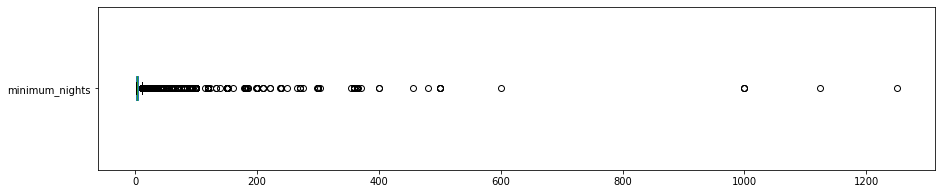

minimum nights: acima de 30:
5669 Entradas
11.2825%


In [0]:
# boxplot minimum_nights

df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# porcentagem de valores de minimum_nights acima de 30

acima = len(df[df.minimum_nights >= 30])
print("minimum nights: acima de 30:")
print("{} Entradas".format(acima))
print("{:.4f}%".format((acima/df.shape[0])*100))

price: acima de 1000:
400 Entradas
0.7961%


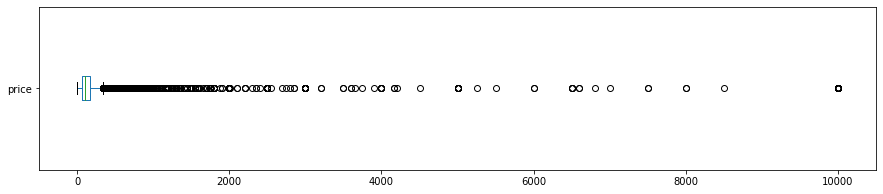

In [0]:
# boxplot para price

df.price.plot(kind='box', vert=False, figsize=(15, 3))

# porcentagem dos valores de price acima de 1000

acima = len(df[df.price >= 1000])
print("price: acima de 1000:")
print("{} Entradas".format(acima))
print("{:.4f}%".format((acima/df.shape[0])*100))

####Histogramas sem *outliers*


Veja **como melhorou** a visualização das variáveis ```price```e ```minimum_nights```. 

Agora é possivel ver que a grande maioria dos preços (```price```) dos imóveis em Nova York está abaixo de 275 dólares sendo que a grande maioria dos imóveis tem quantidade de noite minima (```minimum_nights```) para aluguel inferior a 8 noites.  

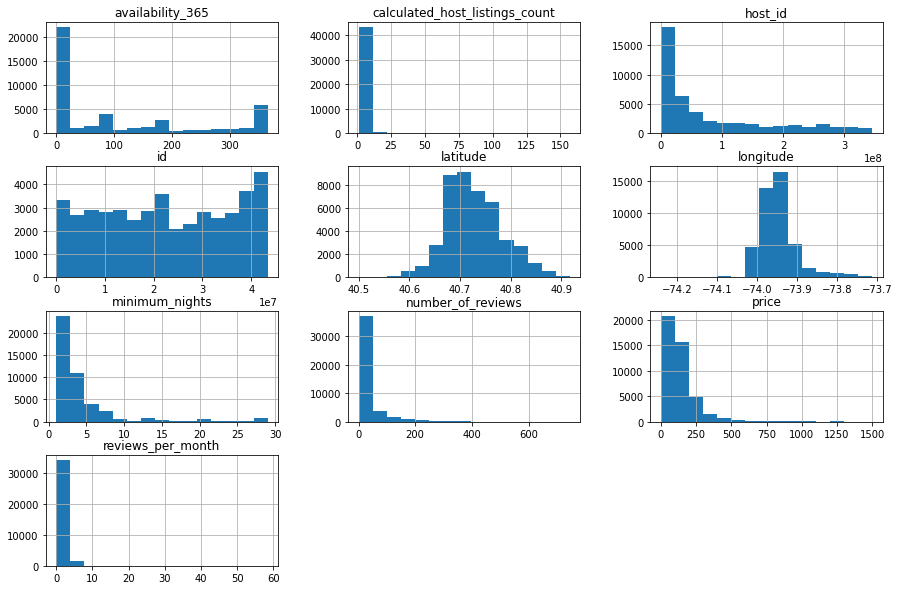

In [8]:
# removendo outliers de price e minimum_nights

df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price >= 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights >= 30].index, axis=0, inplace=True)

# plotando boxplot sem outliers em price e minimum_nights

df_clean.hist(bins=15, figsize=(15,10));

###**Q5 - Qual a média dos preços de aluguel?**

A média pode nos dizer muita coisa sobre o conjunto de dados, principalmente quando analisamos ela juntamente a outras medidas, seja de disperção ou de tendência central.

A média sozinha pode ser usada, por exemplo no caso dos preços, como um fator de tomada de decisão ou para cálculos prévios de uma pessoa que pensa em viajar para Nova York e pretende ficar ospedada em um imóvel do Airbnb.

In [0]:
# fazendo a média para price

print("{:.2f} dólares".format(df["price"].mean()))

163.13 dólares


###**Q6 - Qual a correlação existente entre as variáveis?**

A correlação nos indica se existe algum tipo de relação entre as variáveis, se podemos dizer que uma pode ser escrita em função da outra.

O grau de correlação é o indicativo da intensidade da força que duas variáveis estão correlacionadas, quanto mais próximo de 1 ou -1 temos um indicativo de correlação forte entre as variáveis e quanto mais próximo de 0 temos um indicativo de correlação fraca.

A partir dos cados das variáveis ```price```, ```minimum_nights```, ```number_of_reviews```, ```reviews_per_month```, ```calculated_host_listings_count``` e ```availability_365``` farei:
*  Uma matriz do grau de correlação entre elas 
*  Um *heatmap* a partir desta matriz 

In [14]:
# Fazendo correlação

corr = df_clean[["price", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"]].corr()
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.021939,-0.048637,-0.036705,0.022526,0.092545
minimum_nights,-0.021939,1.000000,-0.101858,-0.155506,0.242478,0.006528
number_of_reviews,-0.048637,-0.101858,1.000000,0.695507,-0.035798,0.254963
reviews_per_month,-0.036705,-0.155506,0.695507,1.000000,0.000884,0.263857
calculated_host_listings_count,0.022526,0.242478,-0.035798,0.000884,1.000000,0.093179
availability_365,0.092545,0.006528,0.254963,0.263857,0.093179,1.000000


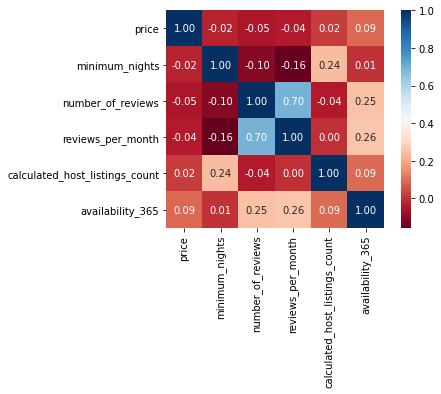

In [31]:
# Fazendo heatmap


sns.heatmap(corr, cmap='RdBu',fmt = '.2f',square=True, linecolor='white', annot=True);

###**Q7 - Qual o tipo de imóvel mais alugado no Airbnb?**

Na coluna ```room_type``` do nosso *dataset* temos a informação do tipo de imóvel que é alugado. As opções disponíveis são casa/apartamentos inteiros, quarto privado, quarto compartilhado e quarto de hotel.

Saber o tipo de imóvel mais alugado, assim como saber a média dos preços dos imóveis, pode ser um bom indicativo para tomada de decisões.

Pelas informações trazidas abaixo vemos que a grande maioria, 97% aproximadamente, dos imóveis oferecidos são casa/apartamento inteiro e quarto privado. Para pessoas mais reservadas que preferer zelar por sua privacidade, a escolha de um imóvel não será problema aparentemente. Porém, pessoas que pensam em ter uma companhia em sua estadia terão que se planejar com antecedência para conseguir encontrar um imóvel.



In [33]:
# Mostrando a quantidade de imóveis disponíveis de cada tipo

df_clean.room_type.value_counts()

Entire home/apt    21985
Private room       20999
Shared room          978
Hotel room           414
Name: room_type, dtype: int64

In [44]:
# Mostrando a porcentagem de imóveis disponíveis de cada tipo

(df_clean.room_type.value_counts()/df_clean.room_type.shape[0])*100

Entire home/apt    49.542546
Private room       47.320624
Shared room         2.203894
Hotel room          0.932937
Name: room_type, dtype: float64

###**Q8 - Qual a localidade mais cara do Airbnb de Nova York?**



Podemos facilmente conseguir encontrar as localidades mais caras utilizando a função ```groupby()``` que agrupa a variável que queremos comparar, no caso bairros(neighbourhood), a partir do preço médio de cada um deles.

Observando o distrito dos três bairros mais caros podemos ficar intrigados. Porque distritos como Manhattan e Queens, que são muito famosos não aparecem em entre os primeiros?

Podemos dizer que esses dados sobre preços em relação a bairros **não são representativos**. Provamos isto observando as entradas temos no *dataset* para Country Club, por exemplo. Veja que só temos **um** imóvel anunciado.

In [50]:
# Monstrando a média de preços dos imóveis por bairro

df_clean.groupby(["neighbourhood"]).price.mean().sort_values(ascending=False)

neighbourhood
Country Club      1000.000000
Fort Wadsworth     700.000000
Woodrow            700.000000
Prince's Bay       506.666667
Sea Gate           369.076923
                     ...     
Hunts Point         56.000000
Bronxdale           53.789474
Grant City          51.857143
Soundview           50.882353
Bull's Head         37.666667
Name: price, Length: 222, dtype: float64

In [79]:
# Verificando distritos dos tres bairros mais carros

print(df_clean.groupby(["neighbourhood"]).neighbourhood_group.unique()["Country Club"])
print(df_clean.groupby(["neighbourhood"]).neighbourhood_group.unique()["Fort Wadsworth"])
print(df_clean.groupby(["neighbourhood"]).neighbourhood_group.unique()["Woodrow"])
print(df_clean.groupby(["neighbourhood"]).neighbourhood_group.unique()["Prince's Bay"])
print(df_clean.groupby(["neighbourhood"]).neighbourhood_group.unique()["Sea Gate"])

['Bronx']
['Staten Island']
['Staten Island']
['Staten Island']
['Brooklyn']


In [80]:
# numero de entradas para o distrito de Country Club

df_clean[df_clean.neighbourhood == "Country Club"]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
39422,36867595,Boat tours to the city and back,66362469,Eddie,Bronx,Country Club,40.84426,-73.81532,Shared room,1000,1,0,NaN,NaN,1,179


###**Q9 - Como se distribui os imóveis do Airbnb pela cidade de Nova York?**

Uma maneira simples e muito visual de obtermos essa informação é plotando um gráfico de disperção utilizando como entradas as coordenadas de latitude e longitude de cada propriedade. 

Com essa visualização podemos identificar regiões mais provaveis de se encontrar um imóvel, ou então definir qual será o local de alocação da propriadade.

Para quem conhece um pouco da geografia de Nova York, fica nitido que a maior concentração de imóveis ocorre na ilha de Manhattan, seguido também por uma grande concentração na região de divisa entra os distritos Queens e Brooklyn.

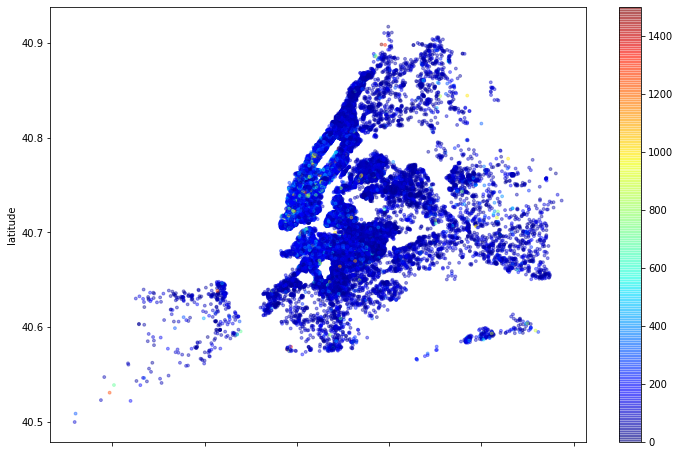

In [95]:
# fazendo grafico de disperção
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_clean["price"], s=8, 
              cmap=plt.get_cmap('jet'), figsize=(12,8));

Outra análise possivel de ser feita olhando para esse gráfico é a localização de imóveis mais caro, agora de maneira confiável. Vemos variações pequenas da cor de alguns pontos na região de Manhattan e Queens puxando para o vermelho, indicando que ali estão os imóveis mais caros.

##Conclusões

Neste *notebook* foi feita uma breve análise sobre um conjunto de dados sobre imóveis do Airbnb de Nova York, a cidade que mais recebe turistas do mundo.

Notou-se peculiaridades como *outliers* em algumas variáveis analisadas e que em algumas localidades a quantidade de imóveis anunciados é muito baixa, oque distorce algumas análises.

Além disso, vemos nitidamente que as regiões mais famosas de Nova York possuem maior quantidade de imóveis disponíveis e que possuem também os imóveis mais caros da cidade, como o esperado.

Podemos levantar uma questão hipótese para ser respondida em uma análise mais detalhista que é verificar se o fato da grande maioria dos imóveis ser um quarto privado ou uma casa/apartamento inteiro tem forte relação com o fato de Nova York ser a cidade que mais recebe turistas no mundo.

Por fim, vale ressaltar que essa foi uma análise feita em cima de dados resumidos, apenas para uma exploração inicial desses dados. É recomendado se fazer análise exploratória com dados completos.